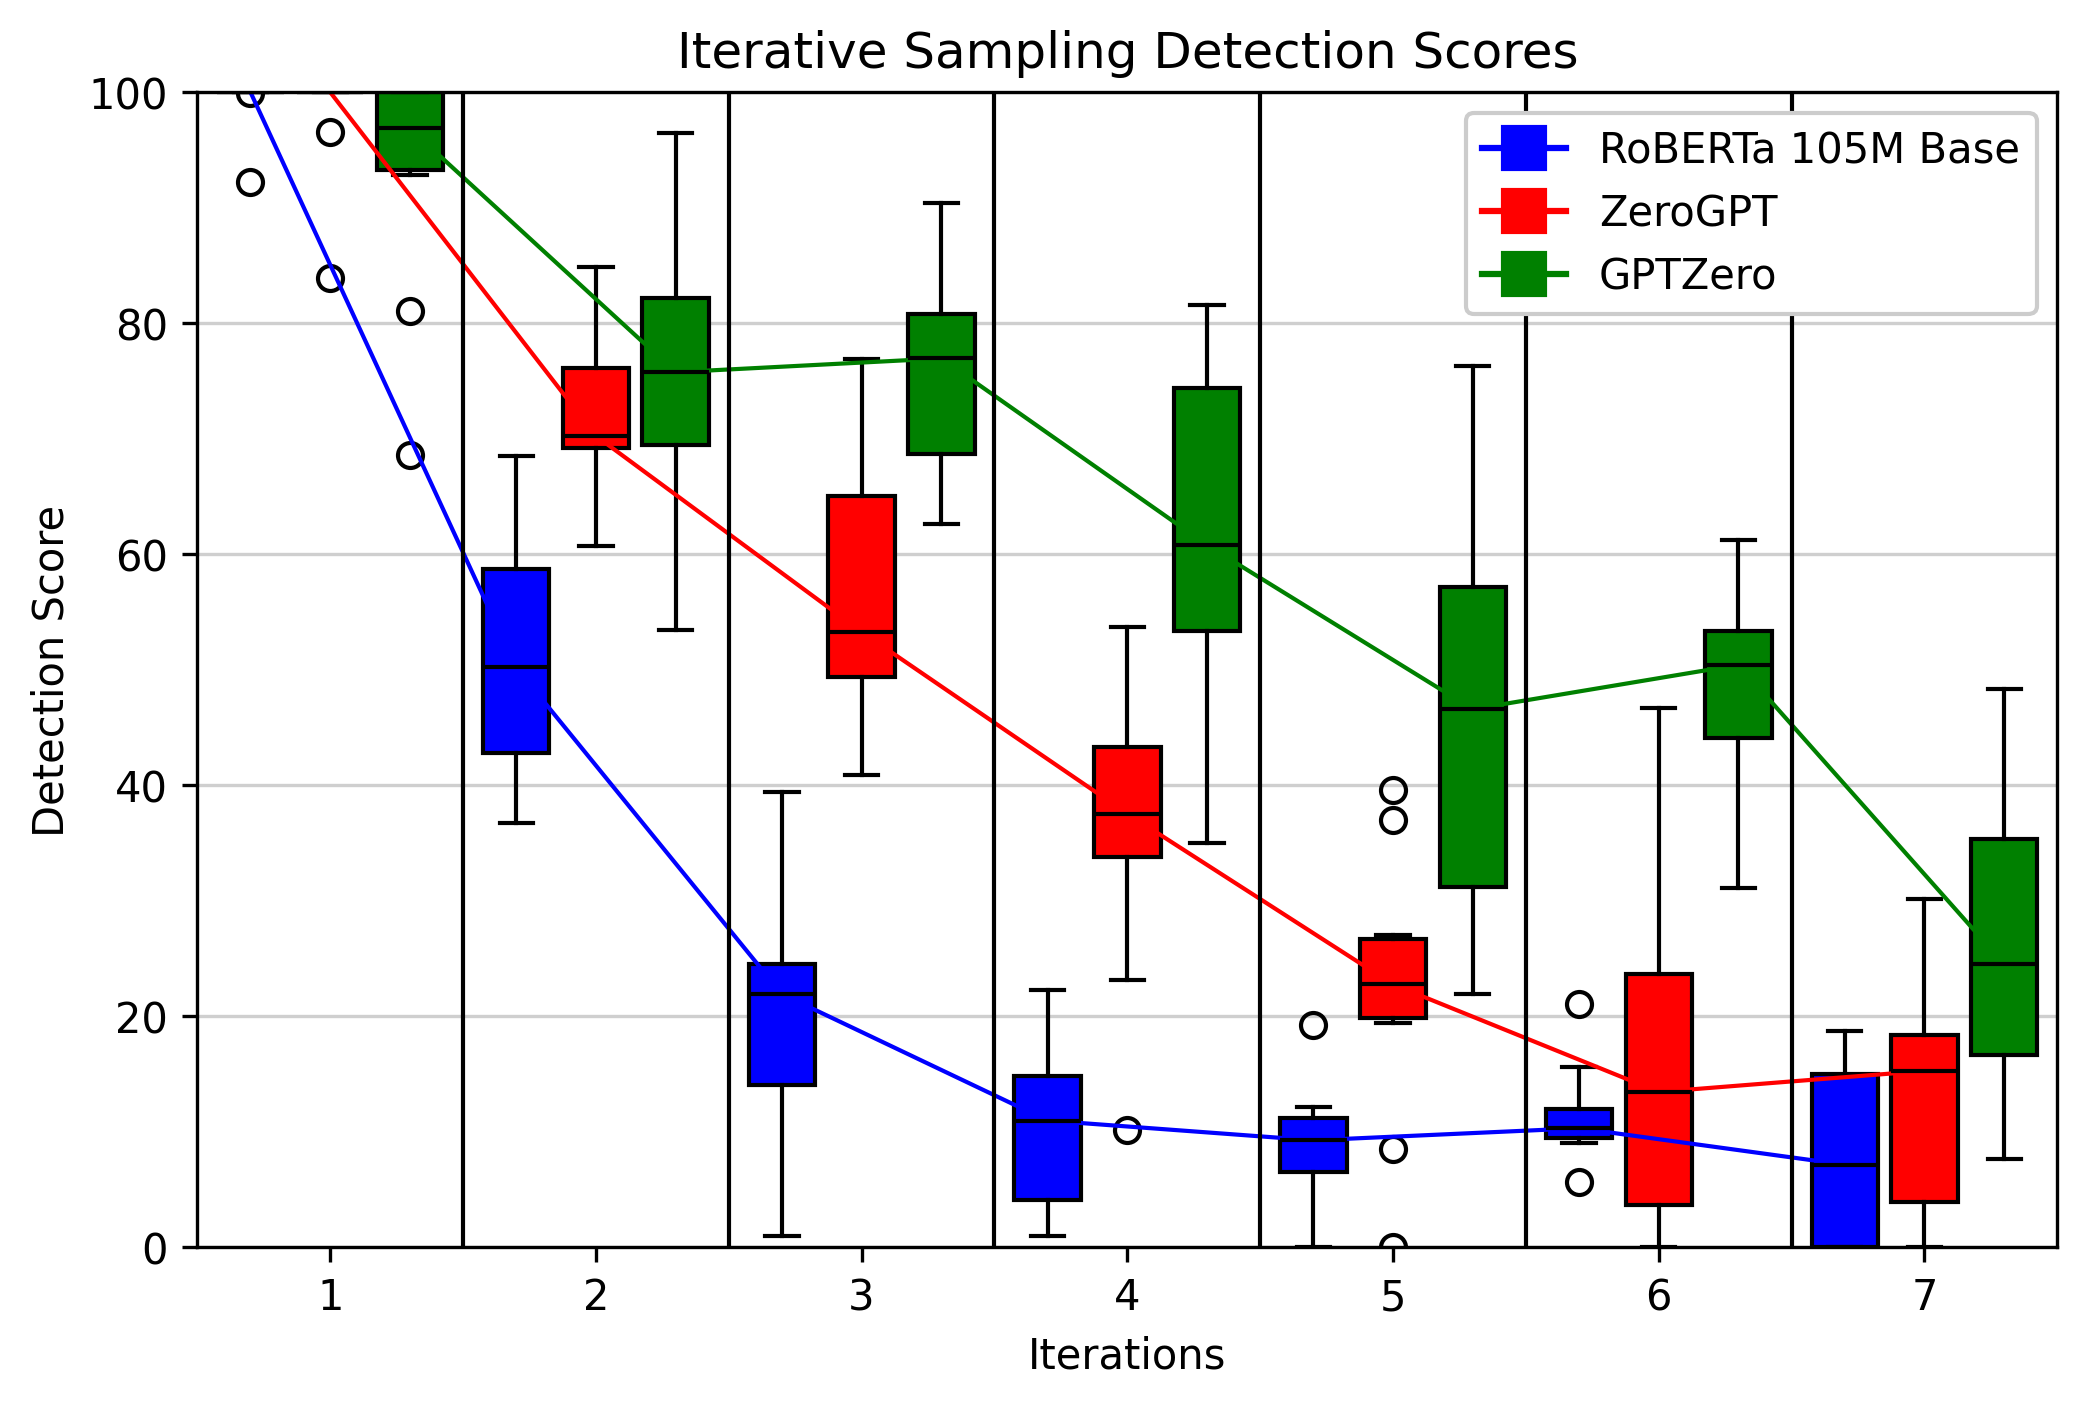

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Generate integer X values (iterations 1 to 7)
x = np.arange(1, 8, 1)
num_samples = 10  # Number of detection scores per iteration

# Function to generate detection scores with exponential decay
def generate_y_samples(initial, decay_factor, noise_level, num_samples):
    samples = []
    for i in range(len(x)):  # Iterate over each iteration
        base_y = initial * (decay_factor ** i)  # Compute base value for iteration i
        noise = np.random.normal(0, noise_level, num_samples)  # Generate noise
        y = base_y + noise  # Apply noise
        samples.append(np.clip(y, 0, 100))  # Clip values within 0-100
    return samples  # Return a list of lists (each sublist = one iteration)

# Generate Y samples for all three conditions
y_blue_samples = generate_y_samples(100, 0.5, 10, num_samples)  # RoBERTa 105M Base (Fast decay)
y_red_samples = generate_y_samples(100, 0.7, 13, num_samples)   # ZeroGPT (Slower decay)
y_green_samples = generate_y_samples(100, 0.85, 15, num_samples)  # GPTZero (Slowest decay)

# Create the boxplot
plt.figure(figsize=(8, 5), dpi=300)  # High-resolution figure

# Increase spacing between boxplots
shift = 0.3  # Adjust the shift amount
positions_blue = x - shift  # Shift blue further left
positions_red = x           # Keep red centered
positions_green = x + shift # Shift green further right

# Plot boxplots
blue_box = plt.boxplot(y_blue_samples, positions=positions_blue, widths=0.25, patch_artist=True, 
                       boxprops=dict(facecolor='blue', alpha=1), medianprops=dict(color='black'))
red_box = plt.boxplot(y_red_samples, positions=positions_red, widths=0.25, patch_artist=True, 
                      boxprops=dict(facecolor='red', alpha=1), medianprops=dict(color='black'))
green_box = plt.boxplot(y_green_samples, positions=positions_green, widths=0.25, patch_artist=True, 
                        boxprops=dict(facecolor='green', alpha=1), medianprops=dict(color='black'))

# Extract median values for each boxplot
medians_blue = [item.get_ydata()[0] for item in blue_box['medians']]
medians_red = [item.get_ydata()[0] for item in red_box['medians']]
medians_green = [item.get_ydata()[0] for item in green_box['medians']]

# Plot fine line connecting medians
plt.plot(positions_blue, medians_blue, color='blue', linestyle='-', linewidth=1)
plt.plot(positions_red, medians_red, color='red', linestyle='-', linewidth=1)
plt.plot(positions_green, medians_green, color='green', linestyle='-', linewidth=1)

# Labels and title
plt.xlabel("Iterations")
plt.ylabel("Detection Score")
plt.title("Iterative Sampling Detection Scores")

# Add legend with square markers and opaque background
legend_elements = [
    plt.Line2D([0], [0], color='blue', marker='s', markersize=10, linestyle='-', label="RoBERTa 105M Base"),
    plt.Line2D([0], [0], color='red', marker='s', markersize=10, linestyle='-', label="ZeroGPT"),
    plt.Line2D([0], [0], color='green', marker='s', markersize=10, linestyle='-', label="GPTZero")
]
plt.legend(handles=legend_elements, loc="upper right", framealpha=1)  # Fully opaque background

# Adjust x-axis ticks
plt.xticks(x, [f"{i}" for i in x])

# Remove margins
plt.margins(0)  # Remove any automatic margins
plt.xlim(min(positions_blue) - 0.2, max(positions_green) + 0.2)  # Remove extra x padding

# Show grid
plt.grid(True, axis='y', linestyle="-", alpha=0.6)

# Add vertical gridlines at midpoints between tick marks
x_mids = (x[:-1] + x[1:]) / 2  # Compute midpoints between tick marks
for x_mid in x_mids:
    plt.axvline(x=x_mid, color='black', linestyle='-', alpha=1, linewidth=1)

# Save high-resolution image
plt.savefig("isampling_test.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()
